In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#Loading ml modules
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
#scores
from sklearn.metrics import accuracy_score, confusion_matrix
#visualization plots 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from matplotlib.colors import ListedColormap


In [3]:
TEST_SIZE = 0.2
KNN_RANGE = np.arange(1, 31)

def main():
    #reading the data 
    data = pd.read_csv('q3.csv', header=None).values
    X = data[:, :-1]
    y = data[:, -1]
    #Seperating the data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE)
    #plots of the data
    #Calculating predictions
    logistic_reg_pred = logistic_regression(X_train, X_test, y_train)
    naive_pred = naive_bayes(X_train, X_test, y_train)
    knn_pred = kneighbors(X_train, X_test, y_train)
    
    print('Accuracy scores for all 54 features')
    print('Logistic Regression score: ', accuracy_score(logistic_reg_pred, y_test))
    print('Naive Bayes score: ', accuracy_score(naive_pred, y_test))
    print('KNN  score: ', accuracy_score(knn_pred, y_test), '\n') 
    
    #Calculating predictions
    logistic_reg_pred = logistic_regression(X_train, X_test, y_train)
    naive_pred = naive_bayes(X_train, X_test, y_train)
    knn_pred = kneighbors(X_train, X_test, y_train)
    
    
    print("plotting Decision boundaries")
    #plot Decision boundaries
    plt.subplot(3, 1, 1)
    plt.title('Logistic regression visuallization for first 2 dimensions')
    model_plot(X_train, y_train, LogisticRegression)
    plt.subplot(3,1, 2)
    plt.title('Naive Bayes visuallization for first 2 dimensions')
    model_plot(X_train, y_train, GaussianNB)
    #plotting
    plt.title("KNN visuallizations for first 2 dimensions")
    plot_knn(X_train, y_train)

In [4]:
def logistic_regression(X_train, X_test,  y_train):
    """predicting data with logistic regression"""
    clf = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
    lreg = clf.predict(X_test)
    return lreg

def naive_bayes(X_train, X_test, y_train):
    """Predicting data with naive_bayes"""
    nb = GaussianNB().fit(X_train, y_train)
    nb_pred = nb.predict(X_test)
    return nb_pred

def kneighbors(X_train, X_test, y_train):
    """Predicting data with Kneighbors"""
    #param_grid = dict(n_neighbors = KNN_RANGE)
    knn = KNeighborsClassifier().fit(X_train, y_train)
    #grid = GridSearchCV(knn, param_grid, scoring = 'accuracy')
    #grid.fit(X_train, y_train)
    knn_pred = knn.predict(X_test)
    return knn_pred

def model_plot(X_train, y_train, model):
    method = model()

    # Create an instance of Logistic Regression Classifier and fit the data.
    method.fit(X_train[:, :2], y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
    y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = method.predict(np.c_[xx.ravel(), yy.ravel()])

    ## Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)

def plot_knn(X_train, y_train):    
    h = .02  # step size in the mesh
    n_neighbors = 3
    # Create color maps
    cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
    cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(X_train[:, :2], y_train)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())




Accuracy scores for all 54 features
Logistic Regression score:  0.9705882352941176
Naive Bayes score:  0.9705882352941176
KNN  score:  0.9705882352941176 

plotting Decision boundaries


/home/dror/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


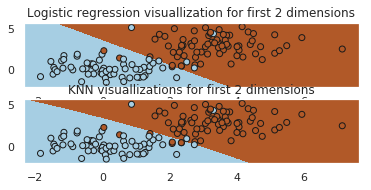

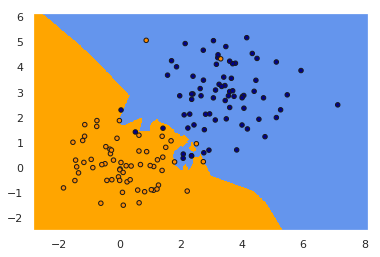

In [5]:
if __name__=='__main__':
    main()


All scores are the same. We can't point on a model that is better than the other.